# A RELM Live example

In [1]:
import sys, os
sys.path.append('..')

In [2]:
from relm import Model,ModelParam,RELMAgent,RELMEvaluator,TheEnvironment, CMAES
import pandas as pd

C:\Users\jkapila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading Data

In [3]:
cdir = os.getcwd()
df = pd.read_parquet(os.path.join(cdir,'creditcard.parquet'))

In [4]:
df.shape

(80000, 31)

In [5]:
round(df.describe(), 2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,...,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00
mean,94836.83,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,88.28,0.00
std,47467.56,1.97,1.67,1.52,1.42,1.37,1.33,1.23,1.22,1.09,...,0.76,0.73,0.66,0.61,0.52,0.48,0.40,0.34,248.35,0.04
min,0.00,-41.93,-60.46,-31.10,-5.42,-35.18,-23.50,-43.56,-50.94,-13.32,...,-22.80,-9.50,-44.81,-2.82,-10.30,-2.60,-22.57,-11.71,0.00,0.00
25%,54076.00,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.56,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84746.50,0.02,0.06,0.18,-0.02,-0.05,-0.28,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139344.50,1.32,0.80,1.02,0.75,0.61,0.40,0.57,0.32,0.60,...,0.18,0.53,0.15,0.44,0.35,0.24,0.09,0.08,76.60,0.00
max,172788.00,2.42,22.06,9.38,16.88,34.10,21.55,36.88,20.01,15.59,...,27.20,8.32,22.53,4.00,7.52,3.04,9.88,22.62,18910.00,1.00


In [6]:
X = df[[x for x in df.columns if x.startswith('V')]].values
y = df.Class.values
print('Data has shape: {}'.format(X.shape))

Data has shape: (80000, 28)


# Building model

In [17]:
# setting agents model behaviour
model_params = ModelParam(
    input_size=28,
    output_size=1,
    layers=[45, 15, 6],
    activation=['tanh', 'tanh', 'tanh', 'sigmoid'],
    noise_bias=0.0,
    output_noise=[False, False, False, True]
)

model = Model(model_params)
print(model)

# setting solver specification
print('\nSolver specification:')
cmaes = CMAES(model.param_count,
              popsize=50,
              weight_decay=0.0,
              sigma_init=0.5
              )
print()
# making agent

# making location for the model assets to be stores
if 'modelstore' not in os.listdir(cdir):
    os.mkdir('modelstore')
else:
    import shutil
    shutil.rmtree('modelstore')
    os.mkdir('modelstore')

agent = RELMAgent(model_params=model_params, solver=cmaes, 
                  n_iteration = 50, # you can increase this to get even better results per learing on agent
                  name='sampletest',
                  location=os.path.join(cdir,'modelstore')
                  )

Model Characteristics 
layers: [45, 15, 6] 
input_size: 28 
output_size: 1 
activation: ['tanh', 'tanh', 'tanh', 'sigmoid'] 
noise_bias: 0.0 
output_noise: [False, False, False, True]

Solver specification:
(25_w,50)-aCMA-ES (mu_w=14.0,w_1=14%) in dimension 2098 (seed=606122, Thu Mar 11 21:50:39 2021)

Polupation is different for solver. Replacing with solver's population!


In [20]:
agent.who_am_i()

{'name': 'sampletest',
 'location': 'modelstore',
 'scorers': ['f1_score', 'accuracy', 'loss', 'cohen_kappa'],
 'my_history': None,
 'my_scores': None,
 'best_model': None,
 'best_population': None,
 'cutoff': 0.9,
 'n_iteration': 50,
 'problem': 'binaryclass'}

## 1st Iteration of Data

Scorers for the experiment are: ['f1_score', 'accuracy', 'loss', 'cohen_kappa']
Iteration:  1 Time: 4.8 secs has fitness: 0.021680 f1_score: 0.021680 accuracy: 0.981950 loss: 0.752344 cohen_kappa: 0.019142
Iteration:  2 Time: 5.2 secs has fitness: 0.021680 f1_score: 0.016327 accuracy: 0.987950 loss: 0.964590 cohen_kappa: 0.013881
Iteration:  3 Time: 6.3 secs has fitness: 0.022774 f1_score: 0.022774 accuracy: 0.952800 loss: 1.271594 cohen_kappa: 0.020110
Iteration:  4 Time: 6.3 secs has fitness: 0.036364 f1_score: 0.036364 accuracy: 0.992050 loss: 1.241365 cohen_kappa: 0.034118
Iteration:  5 Time: 5.9 secs has fitness: 0.036364 f1_score: 0.029412 accuracy: 0.943900 loss: 1.197623 cohen_kappa: 0.026753
Iteration:  6 Time: 5.8 secs has fitness: 0.044444 f1_score: 0.044444 accuracy: 0.989250 loss: 1.603596 cohen_kappa: 0.042096
New best solution found!
Saving model to file: modelstore/sampletest_20000_50_50_6.json
Saving model population to file: modelstore/sampletest_population_20000_50_5

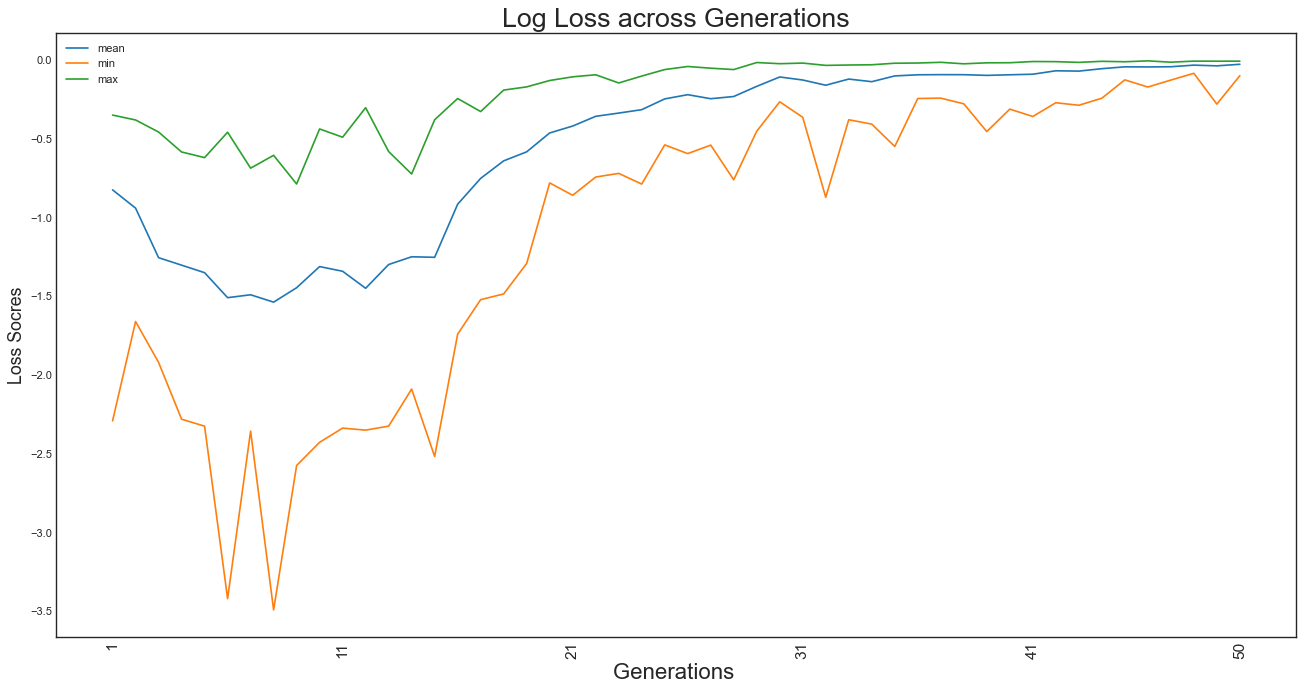

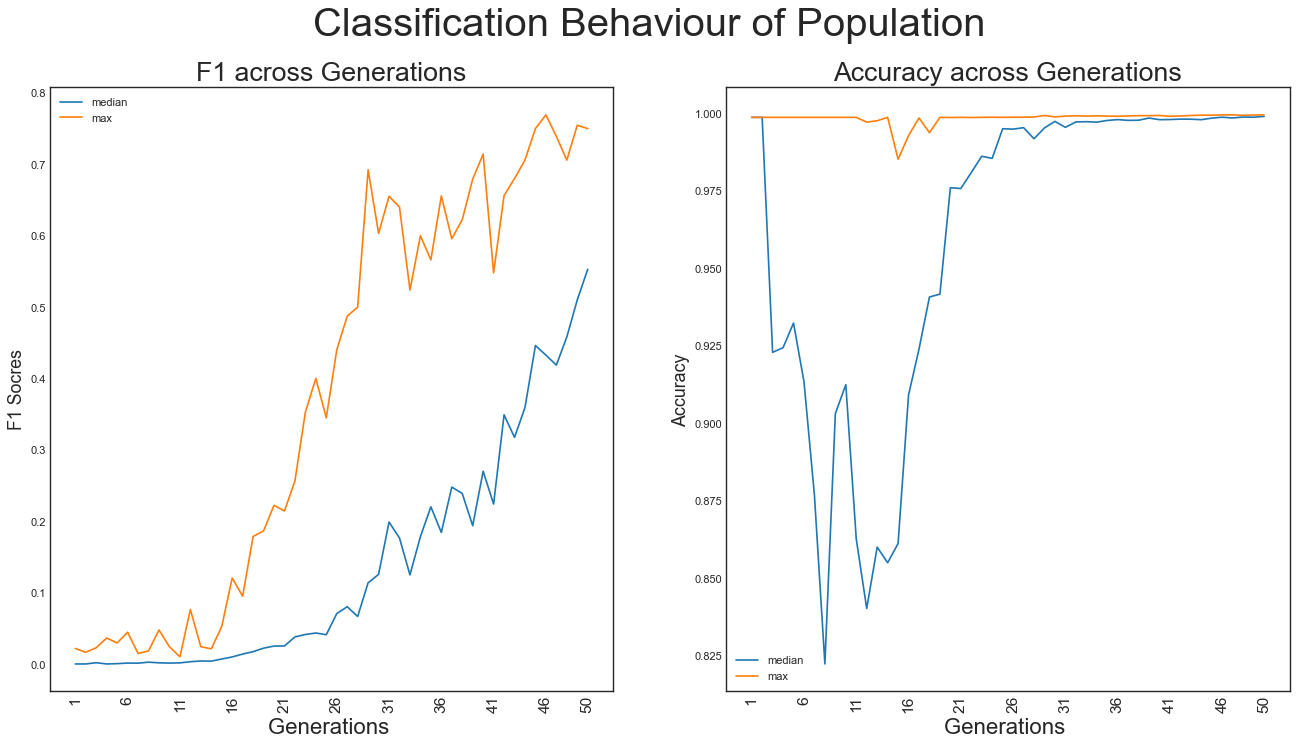

Train Accuracy: 0.9994
Train AUC: 0.8570427169465824
Train F1 Score: 0.7692307692307692
Train Confusion Matrix:
[[19968     4]
 [    8    20]]
Test Accuracy: 0.9990333333333333
Test AUC: 0.8184521529737808
Test F1 Score: 0.6914893617021277
Test Confusion Matrix:
[[59877    21]
 [   37    65]]


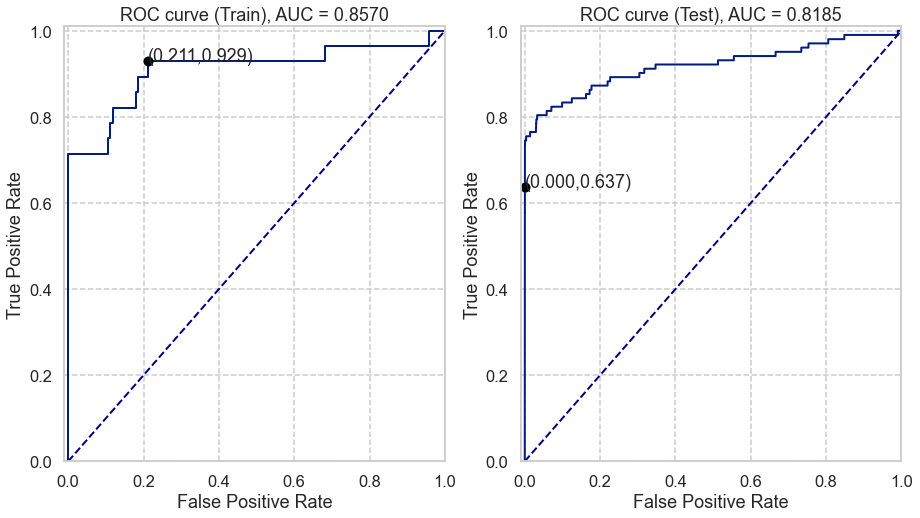

In [21]:
initial_sample = 20000
# 1st set of data
envr = TheEnvironment('f1_score', sample_size=0.8)

# adding samples learnt by network initially
envr.new_data(X[:initial_sample], y[:initial_sample])

agent.execute(X[:initial_sample,],y[:initial_sample,])
# evaluator = RELMEvaluator(num_episodes=15, threshold=14, is_warm=False)
# agent = evaluator.learn(agent, envr)

agent.plot_history()
agent.plot_scoring(X[:initial_sample, ], y[:initial_sample], X[initial_sample:, ], y[initial_sample:, ])



## 2nd Iteration of Data


Running Episode: 1 Action Space: (50000, 28)
Rewards for Episode are: 14.146341463414634 Individual values: [0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318, 0.7073170731707318]

Making agent learn form the new data!
Data Size: (66000, 28) True Positives: 110
Population filled with [29  1 39 16 42 29  1 39 16 42 29  1 39 16 42 29  1 39 16 42 29  1 39 16
 42 29  1 39 16 42 29  1 39 16 42 29  1 39 16 42 29  1 39 16 42 29  1 39
 16 42]
Evoluting for newer generation!
Scorers for the experiment are: ['f1_score', 'accuracy', 'loss', 'cohen_kappa']
Iteration:  1 Time: 18.1 secs has fitness: 0.769231 f1_score: 0.645161 accuracy: 0.998833 loss: 0.023264 cohen_kappa: 0

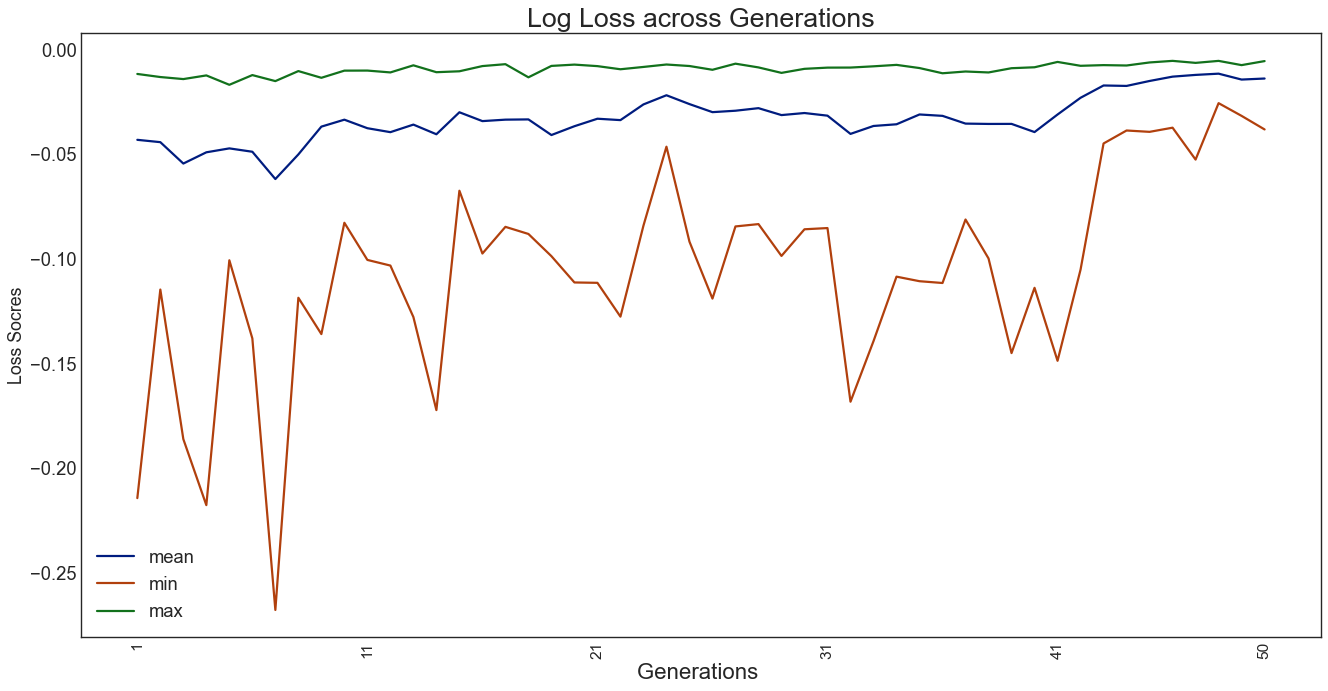

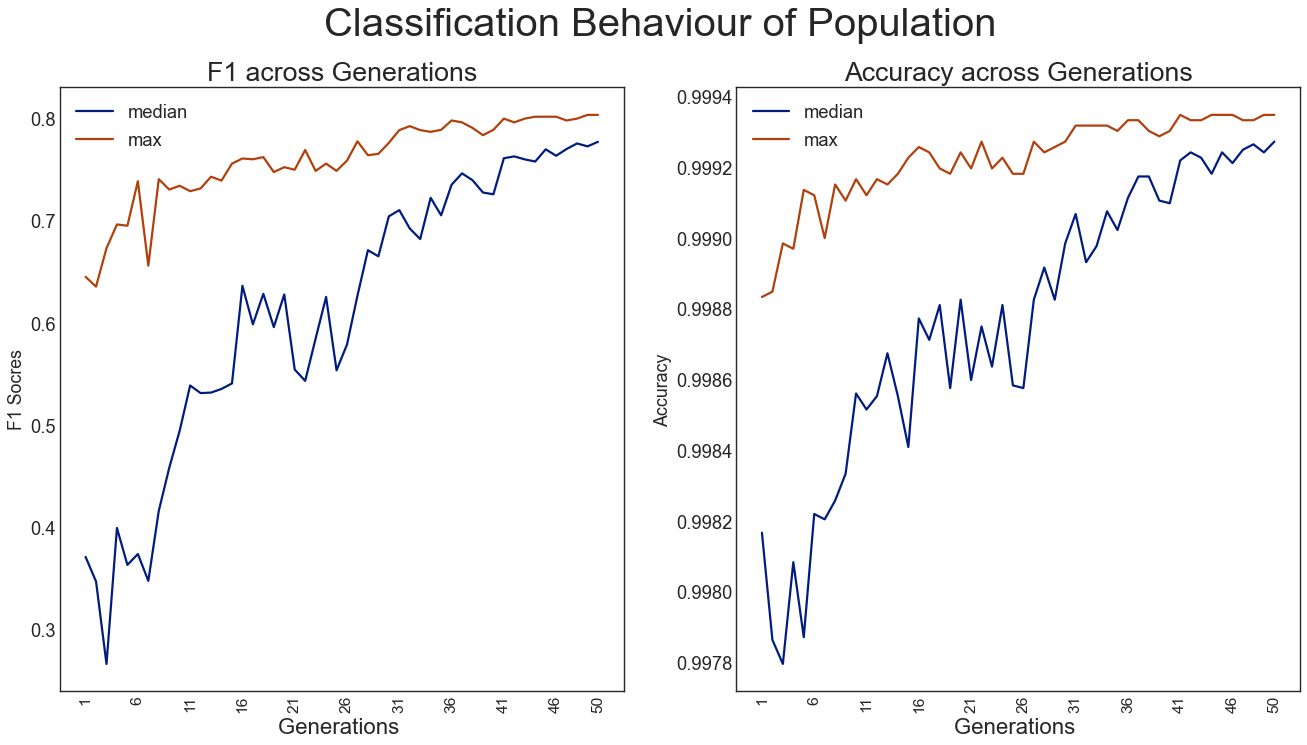

Train Accuracy: 0.99936
Train AUC: 0.9032588264436316
Train F1 Score: 0.8160919540229885
Train Confusion Matrix:
[[49897    15]
 [   17    71]]
Test Accuracy: 0.9993
Test AUC: 0.8213284312322966
Test F1 Score: 0.7200000000000001
Test Confusion Matrix:
[[9984    2]
 [   5    9]]


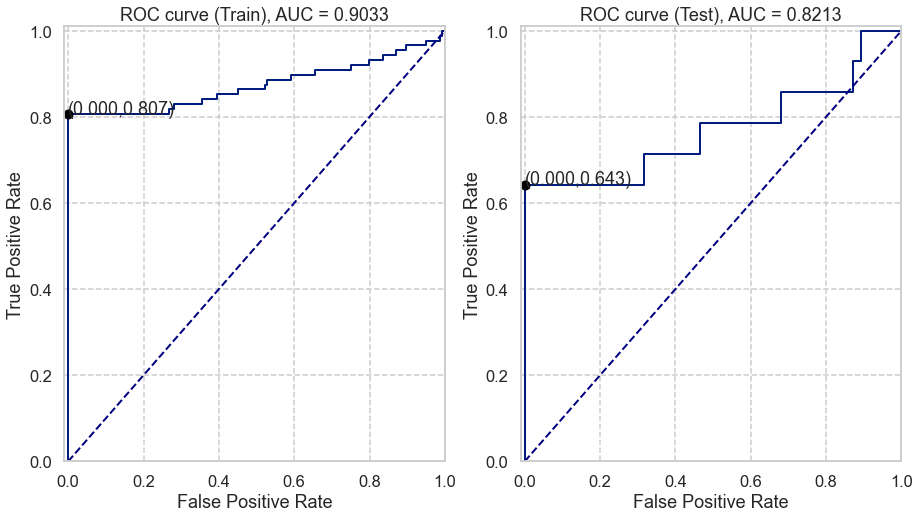

..\relm\codebase\relm_agent.py:221: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  old_tr = np.array(old_tr)


Total history of learning: (51,)


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [22]:
second_sample = 70000
# 2nd set of data
old_agent = agent
agent.reset_history()
envr.new_data(X[initial_sample:second_sample], y[initial_sample:second_sample])

evaluator = RELMEvaluator(num_episodes=20, threshold=16, is_warm=True)
agent = evaluator.learn(agent, envr)

agent.plot_history()
agent.plot_scoring(X[initial_sample:second_sample], y[initial_sample:second_sample], X[second_sample:, ], y[second_sample:, ])




In [ ]:
agent.plot_relm_learning(old_agent)

## 3rd Iteration of Data

In [ ]:
# 3rd set of data
agent.accumulate_history(old_agent)
old_agent = agent
agent.reset_history()
envr.new_data(X[second_sample:], y[second_sample:])

evaluator = RELMEvaluator(num_episodes=20, threshold=16, is_warm=True)
agent = evaluator.learn(agent, envr)

agent.plot_history()
agent.plot_scoring(X[second_sample:], y[second_sample:], X, y)
agent.plot_relm_learning(old_agent)